Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Obtain

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

%matplotlib inline

In [116]:
pd.set_option('display.max_columns',0)
pd.set_option('display.max_rows',0)
# pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [117]:
priceFmt = mpl.ticker.StrMethodFormatter("${x:,.0f}")

def plot_data(X,y,xlabel,ylabel='Price'):
    """ Code courtesy of James Irving"""
    fig, ax = plt.subplots()
    
    ax.scatter(X,y,marker='.')
    
    ax.set(xlabel=xlabel,ylabel=ylabel)
    ax.set_title(f'{xlabel} vs {ylabel}')
    
    ax.yaxis.set_major_formatter(priceFmt)
    return fig,ax

In [118]:
warnings.filterwarnings('ignore')

In [119]:
plt.rcParams['figure.figsize'] = (15,10)

In [120]:
## Reading in data from CSV and create a copy to work on  
info = pd.read_csv('kc_house_data.csv')
data = info.copy()

In [121]:
## Cursory inspection of data
display(data.head(30))

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [122]:
## Check data types and possible missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Initial Scrub and Explore


In [123]:
## Convert data to date-time object

data['date'] = pd.to_datetime(data['date'])

In [124]:
## Check for null values for cleaning up

print(data.isnull().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [125]:
print('Data shape is: ', data.shape)

Data shape is:  (21597, 21)


### Dealing with View Nulls

Starting with the `View` column because it contains the least null values and therefore it is safe to just drop them all with no prior assumptions about the data.

In [126]:
## Checking view column data since it had the fewest null values
## Replace with the median of 0

print('View has',round(data['view'].isnull().sum()/len(data)*100,3),'% null values')
print('View median is:', data['view'].median())
data.view.value_counts()
data['view'] = data['view'].fillna(data['view'].median())
print('View now has',data['view'].isnull().sum(), 'null values')

View has 0.292 % null values
View median is: 0.0
View now has 0 null values


### Dealing with Waterfront Nulls

Looking now towards the `waterfront` column in our data we van see that there are clearly several missing datapoints that need to be addressed. Below we look at the data as a heatmap as plotted on a scatter plot. It is clear that the majority of the values of the data are not waterfront by looking at the points and comparing the two plots. Therefore we will fill the nulls values within waterfront as being 0, so not a `waterfront` property.

In [127]:
## Folium view of the null values in waterfront by lat and long
## the map was slow loading and cluttered, legacy code

# import folium

data['waterfront'] = data['waterfront'].fillna(2)
nullwf = data[data['waterfront'] == 2]
# nullwf['id'] = nullwf['id'].astype('str')
# lat = list(round(nullwf['lat'],3))
# long = list(round(nullwf['long'],3))
# latlong = list(zip(lat, long))

# m = folium.Map(location=[47.6848, -122.016],
#               zoom_start=10)

# # for lat in latlong:
# #     folium.Marker(lat)
    
# for i in range(0,len(nullwf)):
#     folium.Marker([nullwf.iloc[i]['lat'], nullwf.iloc[i]['long']]).add_to(m)

# m

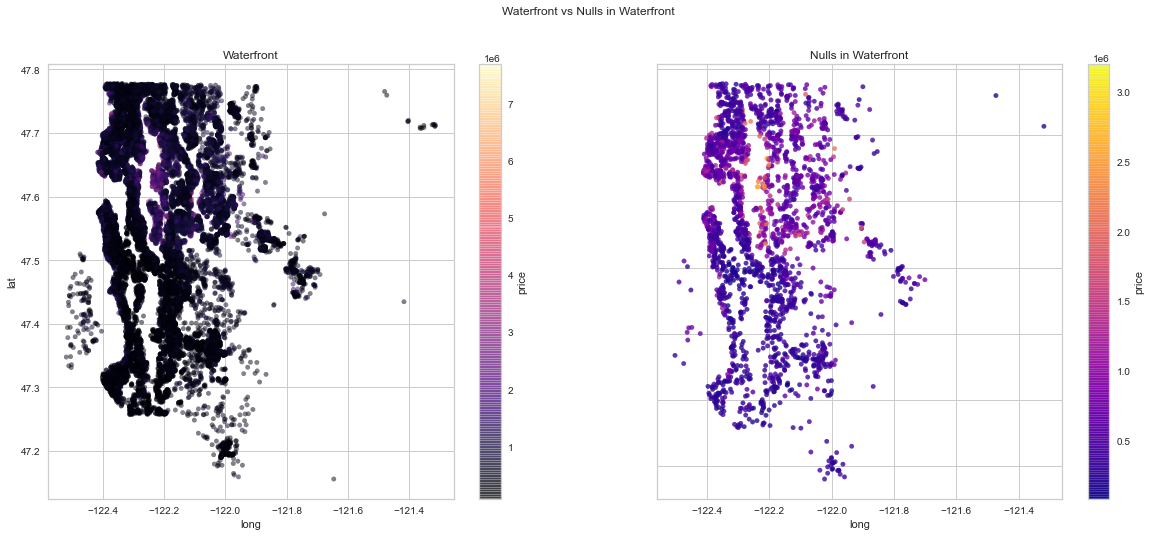

In [128]:
fig, axes = plt.subplots(ncols=2)

data.plot.scatter(x='long', y='lat', c='price', alpha=.5, figsize=(20,8), 
                  cmap='magma', sharey=True, sharex=False, ax=axes[0])
axes[0].set_title('Waterfront')

nullwf.plot.scatter(x='long', y='lat', c='price', alpha=.8, figsize=(20,8), 
                  cmap='plasma', sharey=True, sharex=False, ax=axes[1])
axes[1].set_title('Nulls in Waterfront')

plt.suptitle('Waterfront vs Nulls in Waterfront')
plt.show()

In [129]:
## Check waterfront for nulls and impute the median (0) of the column
## for missing values

print('Waterfront has', round((len(nullwf)/len(data))*100), '% missing values,')
print('Waterfront median:', data['waterfront'].median())

data['waterfront'] = data['waterfront'].replace(2, 1)
data.astype({'waterfront':'int64'}, copy=False)
print('Waterfront now has',data['waterfront'].isnull().sum(), 'null values')

Waterfront has 11 % missing values,
Waterfront median: 0.0
Waterfront now has 0 null values


### Dealing with Year Renovated nulls

 Taking a look at the nulls within the `yr_renovated`, it is impossible to inuit if a house has been renovated from the provided data. Therefore we will just fill the null values within the column with 0 to signify that this house has not been renovated.

In [130]:
## Checking yr_renovated for missing values and filling in

print('Year Renovated has',round(data['yr_renovated'].isnull().sum()/len(data)*100,3),'% null values')
data['yr_renovated'] = data['yr_renovated'].fillna(0)
print('Year Renovated mode:', data['waterfront'].mode())
print('Year Renovated now has',data['yr_renovated'].isnull().sum(), 'null values')

Year Renovated has 17.79 % null values
Year Renovated mode: 0    0.0
dtype: float64
Year Renovated now has 0 null values


Now we have dealt with the null values within the data set. It is time to turn our attention towards our data types to make sure that our data is in the correct type for further analysis and eventually modeling.

In [131]:
## Nulls imputed

print(data.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


### Datatype corrections


Looking forward into the further modeling it is important for our data to be in the correct types. There are several categorical types that are cast as `int` or `float`, and could be converted into a pandas `cat` objects for future use. 

Furthermore, if we take a look at `sqft_basement` we notice that it is cast as an object and is therefore a string. This data needs to be converted into an `int` or a `float` depending on the data. Given enough of the data is missing or zero it may be reasonable to drop the column.

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [133]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.116775,0.233181,3.409825,7.657915,1788.596842,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.321160,0.764673,0.650546,1.173200,827.759761,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [134]:
# Replace question marks in `sqft_basement` 

data['sqft_basement'] = data['sqft_basement'].replace('?',0.0)
data['sqft_basement'] = data['sqft_basement'].astype('float')
data['sqft_basement'] = data['sqft_basement'].astype('int')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int32         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [135]:
## Turn basement into a categorical by converting it into a boolean column

basement = data.copy()
basement['sqft_basement'] = data['sqft_basement'].astype('bool')

In [136]:
data['sqft_basement'] = basement['sqft_basement']

In [137]:
data.drop('sqft_basement', axis=1, inplace=True)

Let's take a look at the categories that should be converted to categorical data types to better be fed into our model. 
* Waterfront - A boolean of is it waterfront or not, therefore categorical.
* Grade - A grade for the home that is given by an assessor for the county, not continuous and therefore categorical. 
* View - A rating of the view from 0 to 4, therefore categorical. 

Along these same lines we are going to convert the `yr_built` column into categorical variables by slicing them into bins of 1 decade (10 years) starting in 1900 and ending in 2020.

Considering the amount of non-renovated or houses with missing renovation data we have elected to drop the column because the few non-values will provide little to no meaningful data.

We are going to also look at binning the zipcode data to get general area vs price data as well.

In [138]:
## Cutting the years into bins for the cut method

decades = list(range(1899, 2020, 10))
lbls = ["1900","1910","1920","1930","1940","1950","1960","1970","1980",
          "1990", "2000","2010"]

## Cutting out the data into decades and dropping the aforementioned columns

data['decade_built'] = pd.cut(data['yr_built'],bins=decades,labels=lbls) 
print('Percentage of homes not renovated or without renovation data', 
      round(len(data[data['yr_renovated'] == 0])/len(data)*100,2),'%')
data.drop('yr_renovated', axis=1, inplace=True)
data.drop('yr_built', axis=1, inplace=True)

Percentage of homes not renovated or without renovation data 96.56 %


In [139]:
## Cutting the zipcode data into bins using the qcut method
## thus avoiding the need to use a continuous series of numbers

# zips = list(data['zipcode'].value_counts().index)
# data['zipcode'] = data['zipcode'].astype('int64')
# data['zips'] = pd.cut(data['zipcode'],bins=70,duplicates='drop',labels=False)  
# # data.drop('zipcode', axis=1, inplace=True)
# data.head()

In [140]:
## Sort by date to explore the date information further

data.sort_values(by='date', axis=0, inplace=True)
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,decade_built
7316,2202500290,2014-05-02,435000.0,4,1.00,1450,8800,1.0,0.0,0.0,4,7,1450,98006,47.5746,-122.135,1260,8942,1950
20586,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,0.0,0.0,3,8,3310,98065,47.5150,-121.870,2380,5000,2010
1040,7197300105,2014-05-02,550000.0,4,2.50,1940,10500,1.0,1.0,0.0,4,7,1140,98052,47.6830,-122.114,2200,10500,1970
20543,3438501320,2014-05-02,295000.0,2,2.50,1630,1368,2.0,0.0,0.0,3,7,1280,98106,47.5489,-122.363,1590,2306,2000
9587,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,0.0,0.0,4,9,1700,98117,47.6833,-122.400,2380,4750,1950
9578,1024069009,2014-05-02,675000.0,5,2.50,2820,67518,2.0,0.0,0.0,3,8,2820,98029,47.5794,-122.025,2820,48351,1970
11879,7305300695,2014-05-02,625000.0,4,2.50,2820,8408,2.0,0.0,0.0,3,9,2820,98155,47.7538,-122.325,1300,8408,2010
11895,3221059036,2014-05-02,400000.0,4,2.50,3630,42884,1.5,0.0,0.0,3,9,2300,98092,47.2617,-122.190,2830,80148,1970
4959,7525000080,2014-05-02,588500.0,3,1.75,2330,14892,1.0,0.0,0.0,3,8,1970,98074,47.6267,-122.046,2570,14217,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [141]:
## The data stretches 13 months acorss 2 years, from May 2014 to May 2015,
## So the months have been binned into 13 bins and labeled according to month

data['month_sold'] = pd.cut(data['date'],bins=13, labels=
                           range(1,14))
data['month_sold'].value_counts()


2     2286
3     2096
12    2084
4     1936
6     1806
1     1775
11    1758
5     1719
7     1530
10    1331
8     1322
9      991
13     963
Name: month_sold, dtype: int64

In [142]:
# ## Typing data as category objects in the dataframe, moved to a lower cell

# cat_cols = ['decade_built', 'waterfront', 'grade', 'view', 'condition', 'month_sold', 'zips']
# data[cat_cols] = data[cat_cols].astype('category')

### Correlation and Linearity

Now, we can take a further look at correlation amongst our columns to see if there are any obvious columns to drop as they do not pertain to the sales price of the houses.

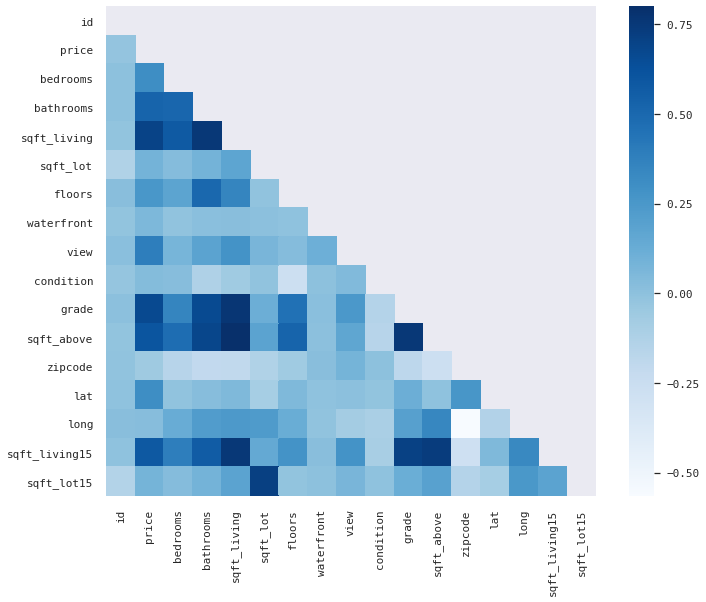

In [143]:
## Heatmap to see general correlation of all data to extract 
## data for further analysis

sns.set(context="notebook", font="monospace")
corrmat = data.corr()
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, mask=mask, vmax=.8, square=True, cmap='Blues');

Upon inspection a few elements can be seen to have no correlation to the price of the houses. Mainly we are looking at the `id` column. Next we can consider a couple more drops we could safely make, namely the `lat` and `long` columns as our area based predictions are being covered by our binned zipcodes. Therefore we are going to drop the `id`, `lat`, and `long` columns from our data so that we can further process it for modeling. 

Finally, our `date` data has been binned into `month_sold` and our original `date` `datetime` column can be dropped from the dataframe.

In [144]:
## Drop the aforementioned columns and check the dataframe

data.drop(labels=['id','lat','long', 'date'], axis=1, inplace=True)

In [145]:
from ipywidgets import interact

In [146]:
target=data['price']

def plot_col(df,col,target='price'):
    """Create a seaborn jointplot to show both linearity and distribution 
    df = Dataframe you are looking to operate on
    col = str or list: Column you wish to be the x axis
    target = string: Column you wish to be the Y axis in you graph, default: 'price'
    """
    
    plot = sns.jointplot(data=df, x=col, y=target, kind='reg')
    plt.suptitle(f"{col} vs {target}")
    return plot

In [147]:
## Separate categorical columns from the numerical and save the numerical

cat_cols = ['decade_built', 'waterfront', 'grade', 'view', 'condition', 'month_sold', 'zipcode']#,'sqft_basement']

num_cols = list(data.columns)
num_cols = [x for x in num_cols if x not in cat_cols]
num_cols.remove('price')

In [148]:
@interact
def show_plot(col=num_cols):
# for col in num_cols:
    plot_col(data,col)

interactive(children=(Dropdown(description='col', options=('bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',…

Now we have a pretty good idea of what our data is looking like. It is important to note a couple of things though:

* A lot of the data does appear normal, which is good for our modeling assumptions.
* There seems to be a general linear relationship between price and our various columns. 

impactful things to note for modeling:
* There are numerous outliers that will effect our model drastically
* There are some remaining features that look conditional, or could be converted to conditional if the needed arises after modeling.

In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7316 to 16580
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          21597 non-null  float64 
 1   bedrooms       21597 non-null  int64   
 2   bathrooms      21597 non-null  float64 
 3   sqft_living    21597 non-null  int64   
 4   sqft_lot       21597 non-null  int64   
 5   floors         21597 non-null  float64 
 6   waterfront     21597 non-null  float64 
 7   view           21597 non-null  float64 
 8   condition      21597 non-null  int64   
 9   grade          21597 non-null  int64   
 10  sqft_above     21597 non-null  int64   
 11  zipcode        21597 non-null  int64   
 12  sqft_living15  21597 non-null  int64   
 13  sqft_lot15     21597 non-null  int64   
 14  decade_built   21597 non-null  category
 15  month_sold     21597 non-null  category
dtypes: category(2), float64(5), int64(9)
memory usage: 2.5 MB


### Outlier Removal

In [150]:
## Continuous
# cols = list(data.select_dtypes('int64').columns)
# cols.append('bathrooms')
# cols.append('price')

In [151]:
# iqr_dict = {}

# for col in cols:
#     q1 = data[col].quantile(.25)
#     q3 = data[col].quantile(.75)
#     iqr = (q3 - q1)*1.5
    
#     test = data[col].between(q1-iqr,q3+iqr)
#     iqr_dict.update({col:test})

In [152]:
# ## Make a DataFrame of Outliers

# outliers = pd.DataFrame(iqr_dict)
# outliers = outliers.apply(lambda x: ~x)
# outliers['any'] = outliers.any(axis=1)

# ## Add column of any outliers

# print(outliers['any'].value_counts())

# index_outliers = outliers['any'].copy()
# display(outliers.head(10))

In [153]:
# # Outlier data removed from chosen variables 

# clean_data = data[~index_outliers].copy()


In [154]:
# len(clean_data)

In [155]:
from yellowbrick.regressor import cooks_distance
from yellowbrick.datasets import load_concrete


In [156]:
clean_data = data.copy()

In [157]:
clean_data['decade_built'] = clean_data['decade_built'].astype('int')
clean_data['month_sold'] = clean_data['month_sold'].astype('int')
# clean_data['sqft_basement'] = clean_data['sqft_basement'].astype('int')

In [158]:
y = clean_data.price
Xlist = list(clean_data.columns)
Xlist.remove('price')
X = clean_data[Xlist]
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,sqft_living15,sqft_lot15,decade_built,month_sold
7316,4,1.00,1450,8800,1.0,0.0,0.0,4,7,1450,98006,1260,8942,1950,1
20586,4,2.50,3310,6500,2.0,0.0,0.0,3,8,3310,98065,2380,5000,2010,1
1040,4,2.50,1940,10500,1.0,1.0,0.0,4,7,1140,98052,2200,10500,1970,1
20543,2,2.50,1630,1368,2.0,0.0,0.0,3,7,1280,98106,1590,2306,2000,1
9587,3,2.50,2600,4750,1.0,0.0,0.0,4,9,1700,98117,2380,4750,1950,1
9578,5,2.50,2820,67518,2.0,0.0,0.0,3,8,2820,98029,2820,48351,1970,1
11879,4,2.50,2820,8408,2.0,0.0,0.0,3,9,2820,98155,1300,8408,2010,1
11895,4,2.50,3630,42884,1.5,0.0,0.0,3,9,2300,98092,2830,80148,1970,1
4959,3,1.75,2330,14892,1.0,0.0,0.0,3,8,1970,98074,2570,14217,1980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


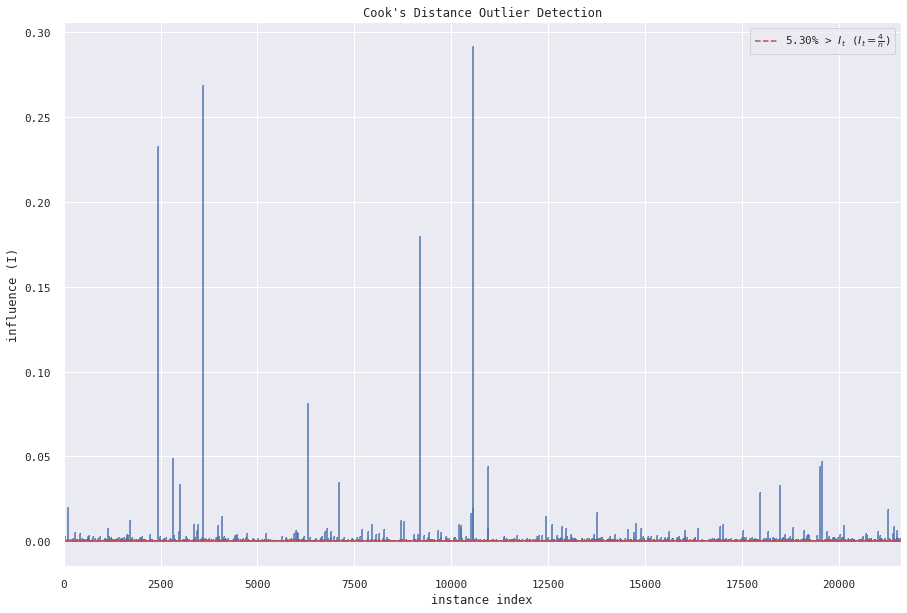

In [159]:
cd = cooks_distance(
    X, y,
    draw_threshold=True,
    linefmt="C0-", markerfmt=","
)

In [160]:
distance = pd.DataFrame(cd.distance_, columns=['distance'])
display(distance)
clean_data['distance'] = distance['distance']

,distance
7316,1.553895e-05
20586,1.878465e-06
1040,2.096332e-05
20543,1.254515e-07
9587,2.916950e-06
9578,3.693643e-06
11879,1.201114e-07
11895,3.081002e-04
4959,2.059651e-06
...,...


In [161]:
clean_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,sqft_living15,sqft_lot15,decade_built,month_sold,distance
7316,435000.0,4,1.00,1450,8800,1.0,0.0,0.0,4,7,1450,98006,1260,8942,1950,1,1.553895e-05
20586,555000.0,4,2.50,3310,6500,2.0,0.0,0.0,3,8,3310,98065,2380,5000,2010,1,1.878465e-06
1040,550000.0,4,2.50,1940,10500,1.0,1.0,0.0,4,7,1140,98052,2200,10500,1970,1,2.096332e-05
20543,295000.0,2,2.50,1630,1368,2.0,0.0,0.0,3,7,1280,98106,1590,2306,2000,1,1.254515e-07
9587,790000.0,3,2.50,2600,4750,1.0,0.0,0.0,4,9,1700,98117,2380,4750,1950,1,2.916950e-06
9578,675000.0,5,2.50,2820,67518,2.0,0.0,0.0,3,8,2820,98029,2820,48351,1970,1,3.693643e-06
11879,625000.0,4,2.50,2820,8408,2.0,0.0,0.0,3,9,2820,98155,1300,8408,2010,1,1.201114e-07
11895,400000.0,4,2.50,3630,42884,1.5,0.0,0.0,3,9,2300,98092,2830,80148,1970,1,3.081002e-04
4959,588500.0,3,1.75,2330,14892,1.0,0.0,0.0,3,8,1970,98074,2570,14217,1980,1,2.059651e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [162]:
cdthreshold = 4/len(data)

In [163]:
clean_data = clean_data[clean_data['distance'] < cdthreshold]

In [164]:
clean_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,sqft_living15,sqft_lot15,decade_built,month_sold,distance
7316,435000.0,4,1.00,1450,8800,1.0,0.0,0.0,4,7,1450,98006,1260,8942,1950,1,1.553895e-05
20586,555000.0,4,2.50,3310,6500,2.0,0.0,0.0,3,8,3310,98065,2380,5000,2010,1,1.878465e-06
1040,550000.0,4,2.50,1940,10500,1.0,1.0,0.0,4,7,1140,98052,2200,10500,1970,1,2.096332e-05
20543,295000.0,2,2.50,1630,1368,2.0,0.0,0.0,3,7,1280,98106,1590,2306,2000,1,1.254515e-07
9587,790000.0,3,2.50,2600,4750,1.0,0.0,0.0,4,9,1700,98117,2380,4750,1950,1,2.916950e-06
9578,675000.0,5,2.50,2820,67518,2.0,0.0,0.0,3,8,2820,98029,2820,48351,1970,1,3.693643e-06
11879,625000.0,4,2.50,2820,8408,2.0,0.0,0.0,3,9,2820,98155,1300,8408,2010,1,1.201114e-07
4959,588500.0,3,1.75,2330,14892,1.0,0.0,0.0,3,8,1970,98074,2570,14217,1980,1,2.059651e-06
3719,463000.0,3,1.75,1710,7320,1.0,0.0,0.0,3,7,1710,98155,2260,8839,1940,1,2.371122e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [165]:
display(clean_data.describe())
clean_data.info()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,sqft_living15,sqft_lot15,decade_built,month_sold,distance
count,2.045300e+04,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,2.045300e+04
mean,4.972087e+05,3.340195,2.067032,1997.244414,13146.982448,1.482130,0.111133,0.170586,3.409280,7.573608,1726.280203,98078.582897,1942.309099,11605.210971,1966.197624,6.478854,1.822073e-05
std,2.499003e+05,0.881746,0.719050,805.389641,29214.563427,0.538091,0.314304,0.635657,0.646604,1.084455,752.303693,53.276021,645.677688,21910.126954,29.258044,3.765094,3.039050e-05
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,98001.000000,399.000000,651.000000,1900.000000,1.000000,5.362469e-13
25%,3.155000e+05,3.000000,1.500000,1400.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,98033.000000,1470.000000,5040.000000,1950.000000,3.000000,1.245069e-06
50%,4.400000e+05,3.000000,2.250000,1870.000000,7500.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1520.000000,98070.000000,1810.000000,7519.000000,1970.000000,6.000000,5.741900e-06
75%,6.190000e+05,4.000000,2.500000,2450.000000,10246.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2120.000000,98118.000000,2300.000000,9827.000000,1990.000000,10.000000,1.999733e-05
max,2.000000e+06,11.000000,5.750000,7730.000000,982998.000000,3.500000,1.000000,4.000000,5.000000,13.000000,7420.000000,98199.000000,5790.000000,560617.000000,2010.000000,13.000000,1.848305e-04


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20453 entries, 7316 to 16580
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20453 non-null  float64
 1   bedrooms       20453 non-null  int64  
 2   bathrooms      20453 non-null  float64
 3   sqft_living    20453 non-null  int64  
 4   sqft_lot       20453 non-null  int64  
 5   floors         20453 non-null  float64
 6   waterfront     20453 non-null  float64
 7   view           20453 non-null  float64
 8   condition      20453 non-null  int64  
 9   grade          20453 non-null  int64  
 10  sqft_above     20453 non-null  int64  
 11  zipcode        20453 non-null  int64  
 12  sqft_living15  20453 non-null  int64  
 13  sqft_lot15     20453 non-null  int64  
 14  decade_built   20453 non-null  int32  
 15  month_sold     20453 non-null  int32  
 16  distance       20453 non-null  float64
dtypes: float64(6), int32(2), int64(9)
memory usage:

In [166]:
@interact
def show_plot(col=num_cols):
# for col in num_cols:
    plot_col(clean_data,col)

interactive(children=(Dropdown(description='col', options=('bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',…

 ## Modeling
 

In [167]:
from makemode import *

In [168]:
y = clean_data.price
Xlist = list(clean_data.columns)
Xlist.remove('price')
X = clean_data[Xlist]

In [169]:
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(X, y)
score = lasso.score(X,y)
importance = np.abs(lasso.coef_)
feature = pd.DataFrame(zip(X.columns, importance), columns=['name','coeff'])
feature

,name,coeff
0,bedrooms,0.000000
1,bathrooms,0.000000
2,sqft_living,178.707526
3,sqft_lot,0.119857
4,floors,0.000000
5,waterfront,0.000000
6,view,0.000000
7,condition,0.000000
8,grade,0.000000
9,sqft_above,6.878699


In [170]:
feature = feature[feature['coeff'] > 0]
featlst = list(feature.name)
featlst.append('price')
featlst.remove('sqft_lot')

In [171]:
new_data = clean_data[featlst]

In [172]:
new_data = clean_data

In [173]:
cat_cols = ['zipcode', 'decade_built', 'month_sold','waterfront', 'grade', 'view', 'condition', 'floors',
            'bedrooms', 'bathrooms']

### One-Hot Encoding

In [174]:
## One-Hot encode all the categorical columns for modeling

ohe_clean_data = pd.get_dummies(data=clean_data, columns=cat_cols, drop_first=True)

In [175]:
## Sanity check the OHE

ohe_clean_data

,price,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,distance,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,...,condition_2,condition_3,condition_4,condition_5,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75
7316,435000.0,1450,8800,1450,1260,8942,1.553895e-05,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20586,555000.0,3310,6500,3310,2380,5000,1.878465e-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1040,550000.0,1940,10500,1140,2200,10500,2.096332e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
20543,295000.0,1630,1368,1280,1590,2306,1.254515e-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9587,790000.0,2600,4750,1700,2380,4750,2.916950e-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9578,675000.0,2820,67518,2820,2820,48351,3.693643e-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11879,625000.0,2820,8408,2820,1300,8408,1.201114e-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4959,588500.0,2330,14892,1970,2570,14217,2.059651e-06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3719,463000.0,1710,7320,1710,2260,8839,2.371122e-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


### Model - Basic Model

In [176]:
def clean_columns(data):
#     data = data.replace('_', '') 
    data = data.replace(',', '') 
    data = data.replace("'", '')
    data = data.replace(' ', '_')
    data = data.replace('_', '')
    data = data.replace(']', '')
    data = data.replace('(', '')
    data = data.replace('.', '')
    return data

In [177]:
## Creating the framework for the formula to feed into statsmodels

cat_predictors = list(ohe_clean_data.columns)
cat_predictors = [clean_columns(x) for x in cat_predictors] 
ohe_clean_data.columns = cat_predictors
cat_predictors.remove('price')

In [178]:
clean_num_cols = ['sqftliving', 'sqftabove', 'sqftliving15', 'sqftlot15', 'sqftbasement', 'monthsold']
cat_predictors = [x for x in cat_predictors if x not in clean_num_cols]
cat_predictors = ' + '.join(cat_predictors)

In [179]:
num_predictors = ' + '.join(clean_num_cols)
predictors = num_predictors + ' + ' + cat_predictors

In [180]:
target = 'price'
formula = target + ' ~ ' + predictors 
formula

'price ~ sqftliving + sqftabove + sqftliving15 + sqftlot15 + sqftbasement + monthsold + sqftlot + distance + zipcode98002 + zipcode98003 + zipcode98004 + zipcode98005 + zipcode98006 + zipcode98007 + zipcode98008 + zipcode98010 + zipcode98011 + zipcode98014 + zipcode98019 + zipcode98022 + zipcode98023 + zipcode98024 + zipcode98027 + zipcode98028 + zipcode98029 + zipcode98030 + zipcode98031 + zipcode98032 + zipcode98033 + zipcode98034 + zipcode98038 + zipcode98039 + zipcode98040 + zipcode98042 + zipcode98045 + zipcode98052 + zipcode98053 + zipcode98055 + zipcode98056 + zipcode98058 + zipcode98059 + zipcode98065 + zipcode98070 + zipcode98072 + zipcode98074 + zipcode98075 + zipcode98077 + zipcode98092 + zipcode98102 + zipcode98103 + zipcode98105 + zipcode98106 + zipcode98107 + zipcode98108 + zipcode98109 + zipcode98112 + zipcode98115 + zipcode98116 + zipcode98117 + zipcode98118 + zipcode98119 + zipcode98122 + zipcode98125 + zipcode98126 + zipcode98133 + zipcode98136 + zipcode98144 + zipcod

In [181]:
ols_data = ohe_clean_data.copy()
ols_data.drop('distance', axis=1, inplace=True)

In [182]:
ols_data.describe()

,price,sqftliving,sqftlot,sqftabove,sqftliving15,sqftlot15,zipcode98002,zipcode98003,zipcode98004,zipcode98005,zipcode98006,zipcode98007,zipcode98008,zipcode98010,zipcode98011,zipcode98014,zipcode98019,zipcode98022,zipcode98023,zipcode98024,zipcode98027,zipcode98028,zipcode98029,zipcode98030,zipcode98031,zipcode98032,zipcode98033,zipcode98034,zipcode98038,zipcode98039,zipcode98040,zipcode98042,zipcode98045,zipcode98052,zipcode98053,zipcode98055,zipcode98056,zipcode98058,zipcode98059,zipcode98065,...,condition2,condition3,condition4,condition5,floors15,floors20,floors25,floors30,floors35,bedrooms2,bedrooms3,bedrooms4,bedrooms5,bedrooms6,bedrooms7,bedrooms8,bedrooms9,bedrooms10,bedrooms11,bathrooms075,bathrooms10,bathrooms125,bathrooms15,bathrooms175,bathrooms20,bathrooms225,bathrooms25,bathrooms275,bathrooms30,bathrooms325,bathrooms35,bathrooms375,bathrooms40,bathrooms425,bathrooms45,bathrooms475,bathrooms50,bathrooms525,bathrooms55,bathrooms575
count,2.045300e+04,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,...,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000,20453.000000
mean,4.972087e+05,1997.244414,13146.982448,1726.280203,1942.309099,11605.210971,0.009534,0.012761,0.008263,0.007823,0.022784,0.006894,0.013299,0.004547,0.009338,0.005085,0.008752,0.009827,0.022931,0.003520,0.019459,0.013543,0.015450,0.012419,0.013054,0.005916,0.019215,0.025913,0.028113,0.000391,0.010756,0.025913,0.010170,0.027624,0.018970,0.012810,0.019361,0.021659,0.022295,0.014228,...,0.007823,0.649538,0.264264,0.077397,0.088251,0.372170,0.005720,0.028260,0.000293,0.132059,0.465262,0.313793,0.067423,0.010463,0.001418,0.000391,0.000147,0.000147,0.000049,0.003080,0.185547,0.000342,0.069770,0.145455,0.092114,0.096563,0.253117,0.053977,0.032954,0.022735,0.028847,0.005183,0.004303,0.001858,0.002787,0.000293,0.000538,0.000196,0.000098,0.000049
std,2.499003e+05,805.389641,29214.563427,752.303693,645.677688,21910.126954,0.097178,0.112244,0.090526,0.088102,0.149218,0.082745,0.114554,0.067280,0.096186,0.071128,0.093143,0.098647,0.149686,0.059229,0.138136,0.115588,0.123337,0.110748,0.113510,0.076690,0.137283,0.158880,0.165300,0.019774,0.103156,0.158880,0.100333,0.163898,0.136423,0.112456,0.137795,0.145572,0.147645,0.118431,...,0.088102,0.477126,0.440952,0.267227,0.283667,0.483395,0.075419,0.165719,0.017126,0.338563,0.498804,0.464045,0.250759,0.101755,0.037629,0.019774,0.012110,0.012110,0.006992,0.055416,0.388750,0.018497,0.254765,0.352568,0.289193,0.295369,0.434808,0.225979,0.178520,0.149061,0.167379,0.071805,0.065454,0.043065,0.052719,0.017126,0.023185,0.013984,0.009888,0.006992
min,7.800000e+04,370.000000,520.000000,370.000000,399.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     946.1
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:42:22   Log-Likelihood:            -2.6192e+05
No. Observations:               20453   AIC:                         5.241e+05
Df Residuals:                   20301   BIC:                         5.253e+05
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.762e+05   5.33e+04     -3.305      0.001   -2.81e+05   -7.17e+04
sqftliving         95.2541      2.234     42.633      0.000      90.875      99.633
sqftlot             0.4152      0.034     12.160      0.000       0.348       0.482
sqftabove          30.6017      2.328     13.148      0.000      26.040      35.164
sqftliving15       21.1111      1.804     11.702      0.000      17.575      24.647
sqftlot15          -0.1763      0.047     -3.785      0.000      -0.268      -0.085
zipcode98002     1551.5471   7958.497      0.195      0.845    -1.4e+04    1.72e+04
zipcode98003     2005.4703   7260.518      0.276      0.782   -1.22e+04    1.62e+04
zipcode98004     5.173e+05   8445.050     61.252      0.000    5.01e+05    5.34e+05
zipcode98005     3.216e+05   8593.478     37.420      0.000    3.05e+05    3.38e+05
zipcode98006     2.546e+05   6447.345     39.490      0.000    2.42e+05    2.67e+05
zipcode98007      2.53e+05   8918.607     28.364      0.000    2.35e+05     2.7e+05
zipcode98008     2.386e+05   7253.101     32.890      0.000    2.24e+05    2.53e+05
zipcode98010     7.368e+04   1.04e+04      7.081      0.000    5.33e+04    9.41e+04
zipcode98011     1.403e+05   7999.472     17.537      0.000    1.25e+05    1.56e+05
zipcode98014     1.058e+05   9995.037     10.581      0.000    8.62e+04    1.25e+05
zipcode98019     9.348e+04   8188.879     11.416      0.000    7.74e+04     1.1e+05
zipcode98022    -4968.2193   7973.530     -0.623      0.533   -2.06e+04    1.07e+04
zipcode98023    -1.569e+04   6287.558     -2.495      0.013    -2.8e+04   -3363.638
zipcode98024     1.334e+05   1.16e+04     11.456      0.000    1.11e+05    1.56e+05
zipcode98027     1.744e+05   6573.447     26.538      0.000    1.62e+05    1.87e+05
zipcode98028     1.279e+05   7146.768     17.898      0.000    1.14e+05    1.42e+05
zipcode98029     2.128e+05   6960.725     30.578      0.000    1.99e+05    2.26e+05
zipcode98030      320.7031   7304.994      0.044      0.965    -1.4e+04    1.46e+04
zipcode98031     1.533e+04   7216.477      2.124      0.034    1182.924    2.95e+04
zipcode98032      317.6689   9372.380      0.034      0.973   -1.81e+04    1.87e+04
zipcode98033     3.203e+05   6547.527     48.919      0.000    3.07e+05    3.33e+05
zipcode98034     1.877e+05   6139.100     30.580      0.000    1.76e+05       2e+05
zipcode98038     3.571e+04   6051.565      5.900      0.000    2.38e+04    4.76e+04
zipcode98039     6.655e+05   3.17e+04     20.981      0.000    6.03e+05    7.28e+05
zipcode98040     4.262e+05   7854.105     54.260      0.000    4.11e+05    4.42e+05
zipcode98042     7807.6064   6108.243      1.278      0.201   -4165.043    1.98e+04
zipcode98045     1.033e+05   7800.109     13.240      0.000     8.8e+04    1.19e+05
zipcode98052     2.402e+05   6092.198     39.419      0.000

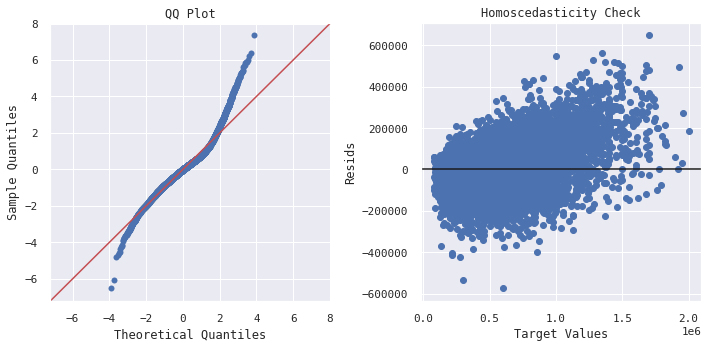

In [183]:
model = make_model(ols_data)

### Min-Max Scaling for Feature Selection

In [184]:
params = list(model.params.index)
# params.append('price')
params.remove('Intercept')
params = params[0:5]
params.append('price')

In [185]:
params

['sqftliving', 'sqftlot', 'sqftabove', 'sqftliving15', 'sqftlot15', 'price']

In [186]:
for param in params: 
    minn = ols_data[param].min()
    maxx = ols_data[param].max()
    ols_data[param] = ols_data[param].apply(lambda x: (x-minn) / (maxx-minn))
    
ols_data

,price,sqftliving,sqftlot,sqftabove,sqftliving15,sqftlot15,zipcode98002,zipcode98003,zipcode98004,zipcode98005,zipcode98006,zipcode98007,zipcode98008,zipcode98010,zipcode98011,zipcode98014,zipcode98019,zipcode98022,zipcode98023,zipcode98024,zipcode98027,zipcode98028,zipcode98029,zipcode98030,zipcode98031,zipcode98032,zipcode98033,zipcode98034,zipcode98038,zipcode98039,zipcode98040,zipcode98042,zipcode98045,zipcode98052,zipcode98053,zipcode98055,zipcode98056,zipcode98058,zipcode98059,zipcode98065,...,condition2,condition3,condition4,condition5,floors15,floors20,floors25,floors30,floors35,bedrooms2,bedrooms3,bedrooms4,bedrooms5,bedrooms6,bedrooms7,bedrooms8,bedrooms9,bedrooms10,bedrooms11,bathrooms075,bathrooms10,bathrooms125,bathrooms15,bathrooms175,bathrooms20,bathrooms225,bathrooms25,bathrooms275,bathrooms30,bathrooms325,bathrooms35,bathrooms375,bathrooms40,bathrooms425,bathrooms45,bathrooms475,bathrooms50,bathrooms525,bathrooms55,bathrooms575
7316,0.185744,0.146739,0.008428,0.153191,0.159711,0.014806,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20586,0.248179,0.399457,0.006087,0.417021,0.367464,0.007767,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1040,0.245578,0.213315,0.010158,0.109220,0.334075,0.017589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
20543,0.112903,0.171196,0.000863,0.129078,0.220924,0.002956,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9587,0.370447,0.302989,0.004305,0.188652,0.367464,0.007320,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9578,0.310614,0.332880,0.068193,0.347518,0.449082,0.085184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
11879,0.284599,0.332880,0.008029,0.347518,0.167130,0.013853,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4959,0.265609,0.266304,0.014628,0.226950,0.402708,0.024226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3719,0.200312,0.182065,0.006921,0.190071,0.345205,0.014622,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


### Feature Selection

In [187]:
y = ols_data.price
Xlist = list(ols_data.columns)
Xlist.remove('price')
X = ols_data[Xlist]

In [188]:
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(X, y)
score = lasso.score(X,y)
importance = np.abs(lasso.coef_)
feature = pd.DataFrame(zip(X.columns, importance), columns=['name','coeff'])
feature

,name,coeff
0,sqftliving,0.382313
1,sqftlot,0.132657
2,sqftabove,0.097683
3,sqftliving15,0.065345
4,sqftlot15,0.000000
5,zipcode98002,0.039122
6,zipcode98003,0.039612
7,zipcode98004,0.221841
8,zipcode98005,0.120438
...,...,...


In [189]:
feature = feature[feature['coeff'] > 0]
featlst = list(feature.name)

In [190]:
featlst.append('price')

In [191]:
lassodata = ols_data[featlst]

In [192]:
lassodata.drop(columns=['sqftabove','sqftliving15'], inplace=True)

In [193]:
lassodata

,sqftliving,sqftlot,zipcode98002,zipcode98003,zipcode98004,zipcode98005,zipcode98006,zipcode98007,zipcode98008,zipcode98010,zipcode98011,zipcode98014,zipcode98019,zipcode98022,zipcode98023,zipcode98024,zipcode98027,zipcode98028,zipcode98029,zipcode98030,zipcode98031,zipcode98032,zipcode98033,zipcode98034,zipcode98038,zipcode98039,zipcode98040,zipcode98042,zipcode98045,zipcode98052,zipcode98053,zipcode98055,zipcode98056,zipcode98058,zipcode98059,zipcode98065,zipcode98070,zipcode98072,zipcode98074,zipcode98075,...,grade5,grade6,grade7,grade9,grade10,grade11,grade12,grade13,view10,view20,view30,view40,condition2,condition3,condition4,condition5,floors15,floors20,floors25,floors30,bedrooms2,bedrooms3,bedrooms4,bedrooms6,bedrooms7,bathrooms075,bathrooms10,bathrooms15,bathrooms175,bathrooms20,bathrooms225,bathrooms25,bathrooms30,bathrooms325,bathrooms35,bathrooms375,bathrooms40,bathrooms425,bathrooms45,price
7316,0.146739,0.008428,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.185744
20586,0.399457,0.006087,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.248179
1040,0.213315,0.010158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.245578
20543,0.171196,0.000863,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.112903
9587,0.302989,0.004305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.370447
9578,0.332880,0.068193,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.310614
11879,0.332880,0.008029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.284599
4959,0.266304,0.014628,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.265609
3719,0.182065,0.006921,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.200312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


#### Model - Feature Selection

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     1056.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:42:43   Log-Likelihood:                 33787.
No. Observations:               20453   AIC:                        -6.731e+04
Df Residuals:                   20320   BIC:                        -6.625e+04
Df Model:                         132                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.0168      0.011     -1.471      0.141      -0.039       0.006
sqftliving          0.4687      0.006     75.830      0.000       0.457       0.481
sqftlot             0.1810      0.012     14.687      0.000       0.157       0.205
zipcode98002       -0.0004      0.004     -0.103      0.918      -0.009       0.008
zipcode98003        0.0009      0.004      0.241      0.809      -0.007       0.008
zipcode98004        0.2701      0.004     61.039      0.000       0.261       0.279
zipcode98005        0.1695      0.005     37.589      0.000       0.161       0.178
zipcode98006        0.1336      0.003     39.633      0.000       0.127       0.140
zipcode98007        0.1320      0.005     28.175      0.000       0.123       0.141
zipcode98008        0.1248      0.004     32.715      0.000       0.117       0.132
zipcode98010        0.0373      0.005      6.828      0.000       0.027       0.048
zipcode98011        0.0754      0.004     17.941      0.000       0.067       0.084
zipcode98014        0.0532      0.005     10.149      0.000       0.043       0.063
zipcode98019        0.0495      0.004     11.508      0.000       0.041       0.058
zipcode98022       -0.0027      0.004     -0.657      0.511      -0.011       0.005
zipcode98023       -0.0078      0.003     -2.350      0.019      -0.014      -0.001
zipcode98024        0.0685      0.006     11.240      0.000       0.057       0.080
zipcode98027        0.0897      0.003     26.051      0.000       0.083       0.096
zipcode98028        0.0670      0.004     17.845      0.000       0.060       0.074
zipcode98029        0.1105      0.004     30.211      0.000       0.103       0.118
zipcode98030        0.0011      0.004      0.280      0.779      -0.006       0.009
zipcode98031        0.0086      0.004      2.274      0.023       0.001       0.016
zipcode98032       -0.0021      0.005     -0.430      0.667      -0.012       0.008
zipcode98033        0.1672      0.003     48.581      0.000       0.160       0.174
zipcode98034        0.0978      0.003     30.284      0.000       0.091       0.104
zipcode98038        0.0204      0.003      6.410      0.000       0.014       0.027
zipcode98039        0.3516      0.017     21.092      0.000       0.319       0.384
zipcode98040        0.2241      0.004     54.492      0.000       0.216       0.232
zipcode98042        0.0055      0.003      1.711      0.087      -0.001       0.012
zipcode98045        0.0534      0.004     13.016      0.000       0.045       0.061
zipcode98052        0.1272      0.003     39.766      0.000       0.121       0.133
zipcode98053        0.1235      0.003     35.461      0.000       0.117       0.130
zipcode98055        0.0174      0.004      4.564      0.000       0.010       0.025
zipcode98056        0.0450      0.003     13.100      0.000

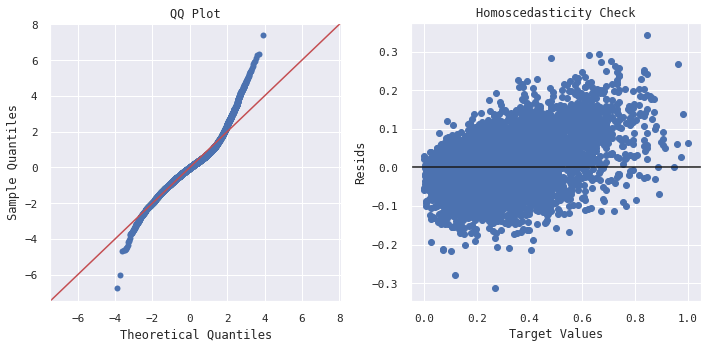

In [194]:
model = make_model(lassodata)

### Variable Influence Factor Testing

In [195]:
df = lassodata.copy()

In [196]:
df.corr().abs()

,sqftliving,sqftlot,zipcode98002,zipcode98003,zipcode98004,zipcode98005,zipcode98006,zipcode98007,zipcode98008,zipcode98010,zipcode98011,zipcode98014,zipcode98019,zipcode98022,zipcode98023,zipcode98024,zipcode98027,zipcode98028,zipcode98029,zipcode98030,zipcode98031,zipcode98032,zipcode98033,zipcode98034,zipcode98038,zipcode98039,zipcode98040,zipcode98042,zipcode98045,zipcode98052,zipcode98053,zipcode98055,zipcode98056,zipcode98058,zipcode98059,zipcode98065,zipcode98070,zipcode98072,zipcode98074,zipcode98075,...,grade5,grade6,grade7,grade9,grade10,grade11,grade12,grade13,view10,view20,view30,view40,condition2,condition3,condition4,condition5,floors15,floors20,floors25,floors30,bedrooms2,bedrooms3,bedrooms4,bedrooms6,bedrooms7,bathrooms075,bathrooms10,bathrooms15,bathrooms175,bathrooms20,bathrooms225,bathrooms25,bathrooms30,bathrooms325,bathrooms35,bathrooms375,bathrooms40,bathrooms425,bathrooms45,price
sqftliving,1.000000,0.186029,0.048292,0.026216,0.032194,0.064129,0.144386,0.019119,0.007772,0.008721,0.028005,1.015337e-03,0.017468,0.036491,0.019005,0.017075,0.076461,0.013726,0.038261,0.006765,0.015547,0.030241,0.043357,0.012522,0.026640,0.002800,0.107666,0.014563,0.000661,0.074440,0.094304,0.033771,0.002325,0.000414,0.070382,0.072639,0.012688,0.049876,0.106866,0.156790,...,0.132720,0.332067,0.342624,0.362022,0.362798,0.291228,0.157595,0.025116,0.059567,0.112702,0.124908,0.074075,0.069776,0.109083,0.085817,0.026521,0.054900,0.439722,0.061526,0.066481,0.372522,0.262898,0.392893,0.130805,0.059420,0.075005,0.484730,0.156517,0.115465,0.085129,0.028068,0.251795,0.146171,0.192715,0.276702,0.141057,0.134553,0.133176,0.153248,0.695363
sqftlot,0.186029,1.000000,0.018967,0.010810,0.005899,0.017016,0.002265,0.007085,0.012366,0.080424,0.006079,9.783965e-02,0.057678,0.136852,0.017743,0.140914,0.068649,0.006475,0.025613,0.008359,0.008430,0.009307,0.014685,0.023035,0.039419,0.000908,0.001659,0.027798,0.077651,0.013063,0.075990,0.012017,0.019103,0.026669,0.005552,0.000845,0.160562,0.068507,0.003573,0.023674,...,0.002258,0.022769,0.061994,0.057279,0.088465,0.065862,0.049479,0.000061,0.003313,0.039415,0.060629,0.002414,0.034391,0.021342,0.025457,0.016647,0.004048,0.015287,0.002860,0.063176,0.046394,0.000176,0.030947,0.009256,0.001228,0.006145,0.054245,0.025590,0.009204,0.000720,0.007900,0.004317,0.012626,0.026195,0.026422,0.026789,0.011054,0.022691,0.011738,0.102560
zipcode98002,0.048292,0.018967,1.000000,0.011154,0.008955,0.008712,0.014981,0.008174,0.011390,0.006631,0.009526,7.013974e-03,0.009219,0.009774,0.015030,0.005831,0.013821,0.011496,0.012290,0.011002,0.011284,0.007569,0.013733,0.016002,0.016687,0.001941,0.010231,0.016002,0.009945,0.016537,0.013643,0.011176,0.013786,0.014598,0.014816,0.011787,0.006737,0.011326,0.014137,0.012699,...,0.047386,0.052229,0.036044,0.035196,0.020580,0.010623,0.004120,0.000686,0.011746,0.017300,0.012641,0.008319,0.008712,0.057641,0.056446,0.013006,0.000371,0.018291,0.007442,0.016731,0.010034,0.019442,0.011048,0.019580,0.003697,0.003626,0.025650,0.014605,0.003762,0.007025,0.001993,0.028186,0.007255,0.014964,0.016909,0.007081,0.006449,0.004233,0.005187,0.103825
zipcode98003,0.026216,0.010810,0.011154,1.000000,0.010378,0.010095,0.017360,0.009472,0.013199,0.007684,0.011038,8.127851e-03,0.010683,0.011326,0.017417,0.006757,0.016016,0.013321,0.014242,0.012749,0.013076,0.008771,0.015913,0.018543,0.019337,0.002249,0.011855,0.018543,0.011524,0.019163,0.015810,0.012951,0.015975,0.016916,0.017168,0.013659,0.007807,0.013125,0.016382,0.014715,...,0.012018,0.024310,0.029800,0.033933,0.015176,0.012310,0.004774,0.000795,0.004843,0.005142,0.011212,0.009640,0.005151,0.002309,0.018797,0.024779,0.024622,0.017245,0.008624,0.019388,0.025048,0.039794,0.013987,0.003129,0.004284,0.006320,0.004962,0.006481,0.002516,0.016507,0.010024,0.002942,0.006347,0.014419,0.016992,0.008206,0.007474,0.005210,0.006010,0.099847
zipcode98004,0.032194,0.005899,0.008955,0.010378,1.000000,0.008105,0.013938,0.007605,0.010597,0.006169,0.008862,6.525468e-03,0.

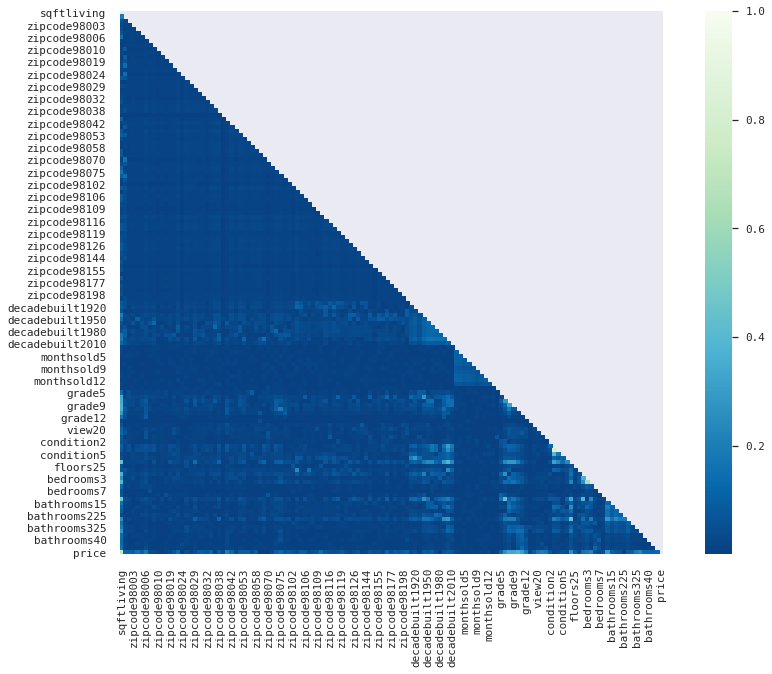

In [197]:
corrmat = df.corr()
corrmat = corrmat.abs()
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))
sns.heatmap(corrmat, mask=mask, square=True, cmap='GnBu_r');

In [198]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [199]:
vifdf = df.drop(columns=['price'],axis=1)
vifdf = sm.add_constant(vifdf)

In [200]:
vifdf

,const,sqftliving,sqftlot,zipcode98002,zipcode98003,zipcode98004,zipcode98005,zipcode98006,zipcode98007,zipcode98008,zipcode98010,zipcode98011,zipcode98014,zipcode98019,zipcode98022,zipcode98023,zipcode98024,zipcode98027,zipcode98028,zipcode98029,zipcode98030,zipcode98031,zipcode98032,zipcode98033,zipcode98034,zipcode98038,zipcode98039,zipcode98040,zipcode98042,zipcode98045,zipcode98052,zipcode98053,zipcode98055,zipcode98056,zipcode98058,zipcode98059,zipcode98065,zipcode98070,zipcode98072,zipcode98074,...,waterfront10,grade5,grade6,grade7,grade9,grade10,grade11,grade12,grade13,view10,view20,view30,view40,condition2,condition3,condition4,condition5,floors15,floors20,floors25,floors30,bedrooms2,bedrooms3,bedrooms4,bedrooms6,bedrooms7,bathrooms075,bathrooms10,bathrooms15,bathrooms175,bathrooms20,bathrooms225,bathrooms25,bathrooms30,bathrooms325,bathrooms35,bathrooms375,bathrooms40,bathrooms425,bathrooms45
7316,1.0,0.146739,0.008428,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
20586,1.0,0.399457,0.006087,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1040,1.0,0.213315,0.010158,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
20543,1.0,0.171196,0.000863,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9587,1.0,0.302989,0.004305,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9578,1.0,0.332880,0.068193,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
11879,1.0,0.332880,0.008029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4959,1.0,0.266304,0.014628,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3719,1.0,0.182065,0.006921,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [201]:
from tqdm import tqdm_notebook as tqdm

In [202]:
vif = [variance_inflation_factor(vifdf.values, i) for i in tqdm(range(vifdf.shape[1]))]

In [203]:
vif_results = pd.Series(dict(zip(vifdf.columns, vif)))
vif_results

const           1229.518804
sqftliving         4.320229
sqftlot            1.268785
zipcode98002       1.559986
zipcode98003       1.734808
zipcode98004       1.515855
zipcode98005       1.491537
zipcode98006       2.390273
zipcode98007       1.420154
zipcode98008       1.802512
zipcode98010       1.274160
zipcode98011       1.542193
                   ...     
bathrooms15        2.586009
bathrooms175       3.775852
bathrooms20        2.796697
bathrooms225       2.695226
bathrooms25        4.498201
bathrooms30        1.568448
bathrooms325       1.449579
bathrooms35        1.601223
bathrooms375       1.130068
bathrooms40        1.125493
bathrooms425       1.075212
bathrooms45        1.121469
Length: 133, dtype: float64

In [204]:
threshold = 6
drop_vif = list(vif_results[vif_results>threshold].index)
if 'const' in drop_vif:
    drop_vif.remove('const')
drop_vif

['decadebuilt1960',
 'decadebuilt1990',
 'decadebuilt2000',
 'condition2',
 'condition3',
 'condition4',
 'condition5']

#### Model - VIF


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1063.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:43:12   Log-Likelihood:                 33356.
No. Observations:               20453   AIC:                        -6.646e+04
Df Residuals:                   20327   BIC:                        -6.546e+04
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0041      0.004      1.078      0.281      -0.003       0.012
sqftliving          0.4851      0.006     77.484      0.000       0.473       0.497
sqftlot             0.1791      0.013     14.272      0.000       0.154       0.204
zipcode98002        0.0035      0.004      0.824      0.410      -0.005       0.012
zipcode98003        0.0018      0.004      0.467      0.640      -0.006       0.009
zipcode98004        0.2747      0.005     60.928      0.000       0.266       0.284
zipcode98005        0.1757      0.005     38.280      0.000       0.167       0.185
zipcode98006        0.1396      0.003     40.679      0.000       0.133       0.146
zipcode98007        0.1381      0.005     28.971      0.000       0.129       0.147
zipcode98008        0.1298      0.004     33.472      0.000       0.122       0.137
zipcode98010        0.0398      0.006      7.146      0.000       0.029       0.051
zipcode98011        0.0749      0.004     17.472      0.000       0.066       0.083
zipcode98014        0.0503      0.005      9.405      0.000       0.040       0.061
zipcode98019        0.0463      0.004     10.564      0.000       0.038       0.055
zipcode98022        0.0007      0.004      0.170      0.865      -0.008       0.009
zipcode98023       -0.0074      0.003     -2.181      0.029      -0.014      -0.001
zipcode98024        0.0686      0.006     11.030      0.000       0.056       0.081
zipcode98027        0.0918      0.004     26.135      0.000       0.085       0.099
zipcode98028        0.0673      0.004     17.557      0.000       0.060       0.075
zipcode98029        0.1116      0.004     29.875      0.000       0.104       0.119
zipcode98030        0.0007      0.004      0.184      0.854      -0.007       0.008
zipcode98031        0.0104      0.004      2.696      0.007       0.003       0.018
zipcode98032        0.0016      0.005      0.317      0.751      -0.008       0.011
zipcode98033        0.1709      0.004     48.681      0.000       0.164       0.178
zipcode98034        0.0988      0.003     30.029      0.000       0.092       0.105
zipcode98038        0.0188      0.003      5.806      0.000       0.012       0.025
zipcode98039        0.3587      0.017     21.080      0.000       0.325       0.392
zipcode98040        0.2333      0.004     55.964      0.000       0.225       0.241
zipcode98042        0.0079      0.003      2.400      0.016       0.001       0.014
zipcode98045        0.0510      0.004     12.215      0.000       0.043       0.059
zipcode98052        0.1288      0.003     39.455      0.000       0.122       0.135
zipcode98053        0.1202      0.004     33.918      0.000       0.113       0.127
zipcode98055        0.0187      0.004      4.808      0.000       0.011       0.026
zipcode98056        0.0505      0.004     14.415      0.000

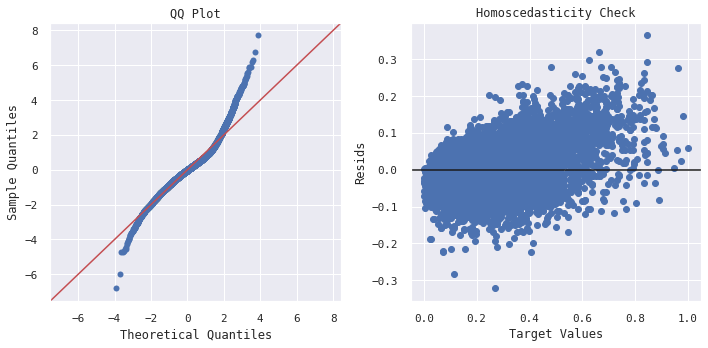

In [205]:
model = make_model(lassodata, drop_cols=[*drop_vif])

### Bad P-Value Extraction

In [206]:
pvalues = model.pvalues[1:].rename('p-values')
pvalues.sort_values(ascending=False,inplace=True)
pvalues

bathrooms30        0.929604
monthsold5         0.912251
zipcode98022       0.865055
zipcode98030       0.853978
zipcode98032       0.751178
monthsold7         0.709546
zipcode98003       0.640428
monthsold6         0.421392
zipcode98002       0.410034
monthsold3         0.236115
monthsold9         0.136886
decadebuilt1980    0.073772
                     ...   
zipcode98105       0.000000
zipcode98109       0.000000
zipcode98112       0.000000
zipcode98115       0.000000
zipcode98117       0.000000
zipcode98119       0.000000
zipcode98122       0.000000
zipcode98199       0.000000
view40             0.000000
grade11            0.000000
grade10            0.000000
sqftliving         0.000000
Name: p-values, Length: 125, dtype: float64

In [207]:
pvalues[pvalues > .05]

bathrooms30        0.929604
monthsold5         0.912251
zipcode98022       0.865055
zipcode98030       0.853978
zipcode98032       0.751178
monthsold7         0.709546
zipcode98003       0.640428
monthsold6         0.421392
zipcode98002       0.410034
monthsold3         0.236115
monthsold9         0.136886
decadebuilt1980    0.073772
waterfront10       0.068106
zipcode98092       0.065047
Name: p-values, dtype: float64

In [208]:
bcoeffs = list(pvalues[pvalues > .05].index)

In [209]:
bcoeffs

['bathrooms30',
 'monthsold5',
 'zipcode98022',
 'zipcode98030',
 'zipcode98032',
 'monthsold7',
 'zipcode98003',
 'monthsold6',
 'zipcode98002',
 'monthsold3',
 'monthsold9',
 'decadebuilt1980',
 'waterfront10',
 'zipcode98092']

#### Model - Bad P-Values Removed

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1196.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:43:13   Log-Likelihood:                 33346.
No. Observations:               20453   AIC:                        -6.647e+04
Df Residuals:                   20341   BIC:                        -6.558e+04
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0047      0.003      1.627      0.104      -0.001       0.010
sqftliving          0.4846      0.006     77.490      0.000       0.472       0.497
sqftlot             0.1781      0.012     14.373      0.000       0.154       0.202
zipcode98004        0.2750      0.004     70.580      0.000       0.267       0.283
zipcode98005        0.1759      0.004     44.093      0.000       0.168       0.184
zipcode98006        0.1401      0.003     54.452      0.000       0.135       0.145
zipcode98007        0.1387      0.004     33.069      0.000       0.130       0.147
zipcode98008        0.1297      0.003     41.313      0.000       0.124       0.136
zipcode98010        0.0401      0.005      7.888      0.000       0.030       0.050
zipcode98011        0.0753      0.004     20.685      0.000       0.068       0.082
zipcode98014        0.0508      0.005     10.516      0.000       0.041       0.060
zipcode98019        0.0467      0.004     12.460      0.000       0.039       0.054
zipcode98023       -0.0067      0.002     -2.695      0.007      -0.012      -0.002
zipcode98024        0.0690      0.006     11.928      0.000       0.058       0.080
zipcode98027        0.0923      0.003     34.410      0.000       0.087       0.098
zipcode98028        0.0677      0.003     21.884      0.000       0.062       0.074
zipcode98029        0.1122      0.003     37.817      0.000       0.106       0.118
zipcode98031        0.0109      0.003      3.475      0.001       0.005       0.017
zipcode98033        0.1714      0.003     63.887      0.000       0.166       0.177
zipcode98034        0.0992      0.002     41.446      0.000       0.095       0.104
zipcode98038        0.0190      0.002      8.221      0.000       0.015       0.024
zipcode98039        0.3581      0.017     21.238      0.000       0.325       0.391
zipcode98040        0.2337      0.003     66.853      0.000       0.227       0.241
zipcode98042        0.0082      0.002      3.460      0.001       0.004       0.013
zipcode98045        0.0516      0.004     14.732      0.000       0.045       0.058
zipcode98052        0.1295      0.002     55.191      0.000       0.125       0.134
zipcode98053        0.1206      0.003     44.257      0.000       0.115       0.126
zipcode98055        0.0189      0.003      5.976      0.000       0.013       0.025
zipcode98056        0.0507      0.003     18.955      0.000       0.045       0.056
zipcode98058        0.0218      0.003      8.578      0.000       0.017       0.027
zipcode98059        0.0555      0.003     21.954      0.000       0.051       0.060
zipcode98065        0.0585      0.003     19.125      0.000       0.052       0.064
zipcode98070        0.0530      0.005     10.395      0.000       0.043       0.063
zipcode98072        0.0904      0.003     28.737      0.000

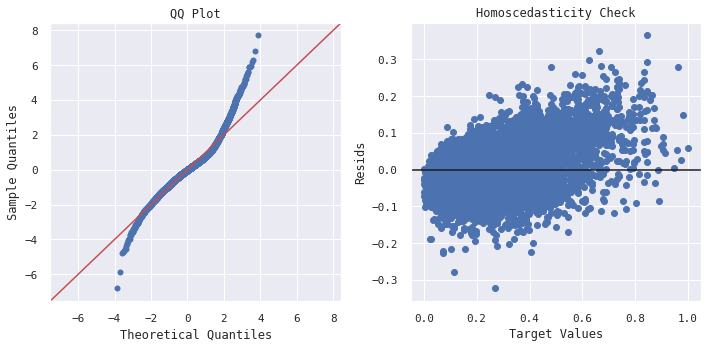

In [210]:
model =  make_model(lassodata, drop_cols=[*bcoeffs, *drop_vif])

### Model Validation

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [212]:
df_train, df_test = train_test_split(lassodata)
df_train.shape, df_test.shape

((15339, 133), (5114, 133))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     900.5
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:43:14   Log-Likelihood:                 24928.
No. Observations:               15339   AIC:                        -4.963e+04
Df Residuals:                   15228   BIC:                        -4.879e+04
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0023      0.003      0.696      0.487      -0.004       0.009
sqftliving          0.4890      0.007     67.449      0.000       0.475       0.503
sqftlot             0.1808      0.014     12.878      0.000       0.153       0.208
zipcode98004        0.2794      0.004     62.518      0.000       0.271       0.288
zipcode98005        0.1712      0.005     36.497      0.000       0.162       0.180
zipcode98006        0.1393      0.003     46.542      0.000       0.133       0.145
zipcode98007        0.1367      0.005     27.861      0.000       0.127       0.146
zipcode98008        0.1310      0.004     36.015      0.000       0.124       0.138
zipcode98010        0.0452      0.006      7.660      0.000       0.034       0.057
zipcode98011        0.0766      0.004     18.375      0.000       0.068       0.085
zipcode98014        0.0496      0.005      9.241      0.000       0.039       0.060
zipcode98019        0.0458      0.004     10.276      0.000       0.037       0.055
zipcode98023       -0.0070      0.003     -2.383      0.017      -0.013      -0.001
zipcode98024        0.0697      0.007     10.094      0.000       0.056       0.083
zipcode98027        0.0938      0.003     29.846      0.000       0.088       0.100
zipcode98028        0.0678      0.004     19.121      0.000       0.061       0.075
zipcode98029        0.1124      0.003     32.473      0.000       0.106       0.119
zipcode98031        0.0124      0.004      3.403      0.001       0.005       0.019
zipcode98033        0.1747      0.003     56.042      0.000       0.169       0.181
zipcode98034        0.0982      0.003     35.773      0.000       0.093       0.104
zipcode98038        0.0171      0.003      6.414      0.000       0.012       0.022
zipcode98039        0.3579      0.017     21.074      0.000       0.325       0.391
zipcode98040        0.2350      0.004     57.994      0.000       0.227       0.243
zipcode98042        0.0086      0.003      3.137      0.002       0.003       0.014
zipcode98045        0.0512      0.004     12.601      0.000       0.043       0.059
zipcode98052        0.1307      0.003     47.814      0.000       0.125       0.136
zipcode98053        0.1217      0.003     38.408      0.000       0.115       0.128
zipcode98055        0.0196      0.004      5.395      0.000       0.012       0.027
zipcode98056        0.0512      0.003     16.706      0.000       0.045       0.057
zipcode98058        0.0218      0.003      7.342      0.000       0.016       0.028
zipcode98059        0.0545      0.003     18.524      0.000       0.049       0.060
zipcode98065        0.0574      0.004     16.388      0.000       0.051       0.064
zipcode98070        0.0559      0.006      9.487      0.000       0.044       0.067
zipcode98072        0.0879      0.004     24.347      0.000

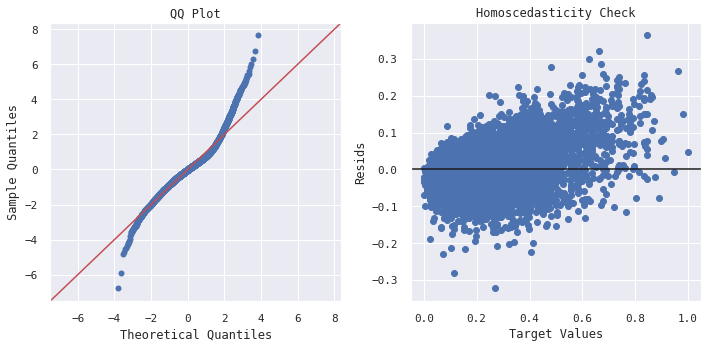

In [213]:
model = make_model(df_train,drop_cols=[*drop_vif,*bcoeffs])

In [214]:
r2dict = {}
r2scores = {}
for x in tqdm(range(0, 20)):
    df_train, df_test = train_test_split(lassodata)
    model = make_model(df_train,drop_cols=[*drop_vif,*bcoeffs], show_sum=False)
#     r2dict.update({model.rsquared:model})
    y_train = model.predict(df_train)
    y_test = model.predict(df_test)
    r2_train = r2_score(df_train['price'],y_train)
    r2_test = r2_score(df_test['price'],y_test)
    
    r2dict.update({r2_test:[r2_test, model]})
    
#     split.update({model.rsquared:[df_train, df_test]})

In [215]:
besttest = max(r2dict.items())

In [216]:
besttest[1]

[0.8698296840334834,

In [217]:
bestmodel = besttest[1][1]

In [218]:
df_train, df_test = train_test_split(lassodata)

In [219]:
y_train = bestmodel.predict(df_train)

In [220]:
y_test = bestmodel.predict(df_test)

In [221]:
r2_train = r2_score(df_train['price'],y_train)
r2_test = r2_score(df_test['price'],y_test)
print(f"Training Score: {r2_train}")
print(f"Test Score: {r2_test}")

Training Score: 0.8678975568624567
Test Score: 0.8635420506622286


In [222]:
bestmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     884.1
Date:                Mon, 31 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:43:31   Log-Likelihood:                 25044.
No. Observations:               15339   AIC:                        -4.986e+04
Df Residuals:                   15227   BIC:                        -4.901e+04
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0051      0.003      1.524      0.128      -0.001       0.012
sqftliving          0.4823      0.007     66.485      0.000       0.468       0.497
sqftlot             0.1874      0.015     12.797      0.000       0.159       0.216
zipcode98004        0.2758      0.005     59.660      0.000       0.267       0.285
zipcode98005        0.1731      0.005     38.453      0.000       0.164       0.182
zipcode98006        0.1385      0.003     45.891      0.000       0.133       0.144
zipcode98007        0.1414      0.005     29.248      0.000       0.132       0.151
zipcode98008        0.1302      0.004     36.191      0.000       0.123       0.137
zipcode98010        0.0448      0.006      7.805      0.000       0.034       0.056
zipcode98011        0.0763      0.004     18.669      0.000       0.068       0.084
zipcode98014        0.0518      0.005      9.672      0.000       0.041       0.062
zipcode98019        0.0459      0.004     10.578      0.000       0.037       0.054
zipcode98023       -0.0059      0.003     -2.043      0.041      -0.011      -0.000
zipcode98024        0.0751      0.007     11.149      0.000       0.062       0.088
zipcode98027        0.0921      0.003     29.930      0.000       0.086       0.098
zipcode98028        0.0670      0.004     19.074      0.000       0.060       0.074
zipcode98029        0.1112      0.003     32.289      0.000       0.104       0.118
zipcode98031        0.0104      0.004      2.962      0.003       0.004       0.017
zipcode98033        0.1730      0.003     56.845      0.000       0.167       0.179
zipcode98034        0.0993      0.003     35.796      0.000       0.094       0.105
zipcode98038        0.0186      0.003      7.025      0.000       0.013       0.024
zipcode98039        0.3524      0.021     16.561      0.000       0.311       0.394
zipcode98040        0.2319      0.004     55.083      0.000       0.224       0.240
zipcode98042        0.0084      0.003      3.135      0.002       0.003       0.014
zipcode98045        0.0484      0.004     11.741      0.000       0.040       0.056
zipcode98052        0.1306      0.003     47.571      0.000       0.125       0.136
zipcode98053        0.1223      0.003     39.266      0.000       0.116       0.128
zipcode98055        0.0179      0.004      4.870      0.000       0.011       0.025
zipcode98056        0.0512      0.003     16.523      0.000       0.045       0.057
zipcode98058        0.0230      0.003      7.923      0.000       0.017       0.029
zipcode98059        0.0566      0.003     19.481      0.000       0.051       0.062
zipcode98065        0.0602      0.004     16.958      0.000       0.053       0.067
zipcode98070        0.0514      0.006      8.863      0.000       0.040       0.063
zipcode98072        0.0895      0.004     24.671      0.000

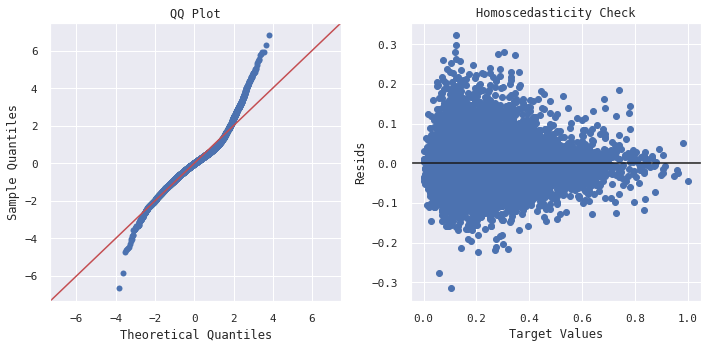

In [223]:
fig,ax = plt.subplots(ncols=2,figsize=(10,5))
sm.graphics.qqplot(bestmodel.resid,fit=True, line='45',ax=ax[0])
ax[0].set_title('QQ Plot')
ax[1].scatter(x=df_train['price'],y=bestmodel.resid)
ax[1].axhline(0,color='k')
ax[1].set(ylabel='Resids',title='Homoscedasticity Check',
                      xlabel='Target Values')
plt.tight_layout()
plt.show()

In [224]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

white_test = het_white(bestmodel.resid,  bestmodel.model.exog)

In [225]:
bp_test = het_breuschpagan(bestmodel.resid, bestmodel.model.exog)

In [226]:
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))
print(dict(zip(labels, white_test)))

{'LM Statistic': 2649.0817218571938, 'LM-Test p-value': 0.0, 'F-Statistic': 28.637025073858574, 'F-Test p-value': 0.0}
{'LM Statistic': 9048.13873990611, 'LM-Test p-value': 0.0, 'F-Statistic': 5.457802492151507, 'F-Test p-value': 0.0}


#### Model Limitations